In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append("../")
from helper_functions import *

In [3]:
x_train = np.load("Data/xtrain.npy")
y_test = np.load("Data/ytest.npy")
x_test = np.load("Data/xtest.npy")
y_train = np.load("Data/ytrain.npy")

In [4]:
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)
x.shape, y.shape

((7874, 768), (7874,))

In [20]:
from sklearn.utils import shuffle

x,y = shuffle(x,y)
x_test, y_test = shuffle(x_test, y_test)

                 Model Performance
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       208
           1       0.64      0.74      0.68       106
           2       0.53      0.51      0.52       106
           3       0.51      0.48      0.50        56
           4       0.71      0.87      0.78       235
           5       0.72      0.69      0.71        95
           6       0.63      0.45      0.53        58
           7       0.74      0.78      0.76       206
           8       0.80      0.71      0.75       129
           9       0.56      0.40      0.47       188
          10       0.91      0.95      0.93       188

    accuracy                           0.70      1575
   macro avg       0.68      0.66      0.66      1575
weighted avg       0.70      0.70      0.70      1575

Accuracy = 70.29%


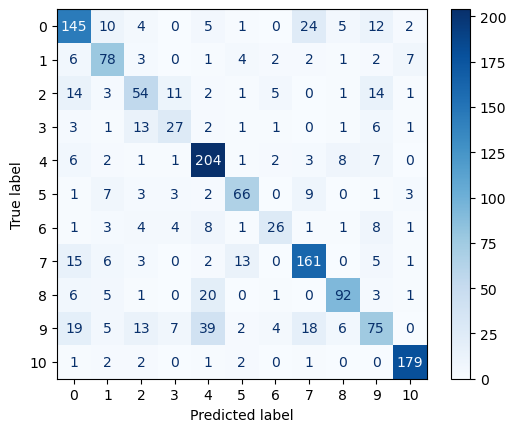

In [5]:
lreg_ft = LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
lreg_ft.fit(x_train, y_train)
performance(lreg_ft, x_test, y_test)

In [8]:
model = joblib.load("Models/Initial/Logistic Regression.pk1")

                 Model Performance
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       208
           1       0.73      0.79      0.76       106
           2       0.64      0.56      0.60       106
           3       0.63      0.55      0.59        56
           4       0.80      0.85      0.82       235
           5       0.77      0.74      0.75        95
           6       0.62      0.62      0.62        58
           7       0.78      0.79      0.78       206
           8       0.81      0.77      0.79       129
           9       0.60      0.56      0.58       188
          10       0.93      0.96      0.95       188

    accuracy                           0.75      1575
   macro avg       0.73      0.72      0.73      1575
weighted avg       0.75      0.75      0.75      1575

Accuracy = 75.37%


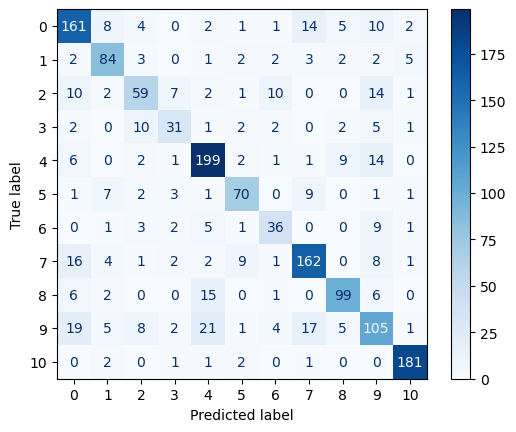

In [23]:
performance(model, x_test, y_test)

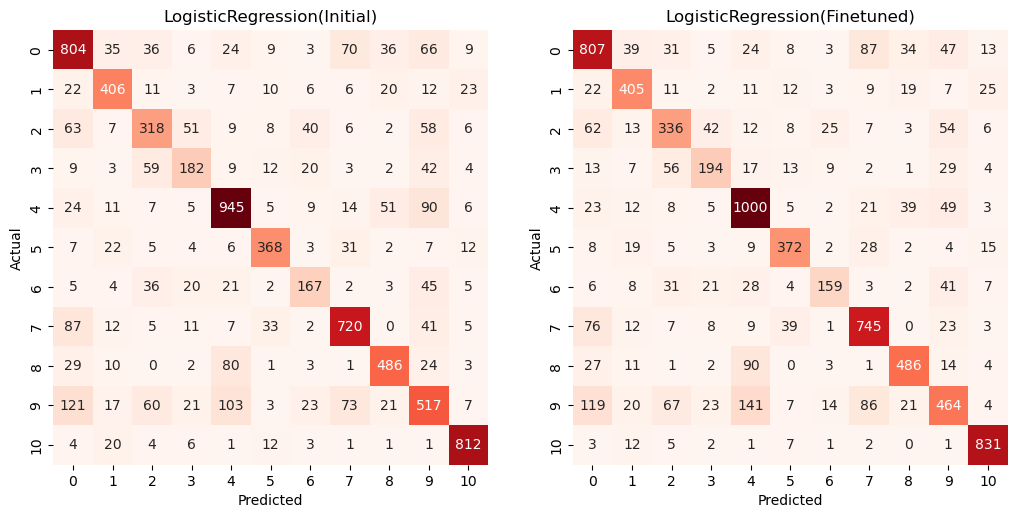

In [11]:
compare_heatmaps(
    {
        'LogisticRegression(Initial)': model,
        'LogisticRegression(Finetuned)': lreg_ft
    },
    x,
    y
)

In [13]:
compare_performance(
    {
        'LogisticRegression(Initial)': model,
        'LogisticRegression(Finetuned)': lreg_ft
    },
    x_test, y_test
)

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,LogisticRegression(Initial),0.754,0.722,0.730,0.641,0.633,0.796,0.769,0.621,0.783,...,0.760,0.596,0.590,0.821,0.753,0.621,0.785,0.789,0.580,0.948
1,LogisticRegression(Finetuned),0.703,0.668,0.639,0.535,0.509,0.713,0.717,0.634,0.735,...,0.684,0.522,0.495,0.783,0.706,0.525,0.758,0.754,0.467,0.932


                 Model Performance
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       208
           1       0.66      0.75      0.70       106
           2       0.55      0.51      0.53       106
           3       0.50      0.45      0.47        56
           4       0.77      0.83      0.80       235
           5       0.68      0.68      0.68        95
           6       0.60      0.55      0.58        58
           7       0.73      0.76      0.75       206
           8       0.80      0.72      0.76       129
           9       0.51      0.46      0.48       188
          10       0.91      0.95      0.93       188

    accuracy                           0.70      1575
   macro avg       0.67      0.67      0.67      1575
weighted avg       0.70      0.70      0.70      1575

Accuracy = 70.1%


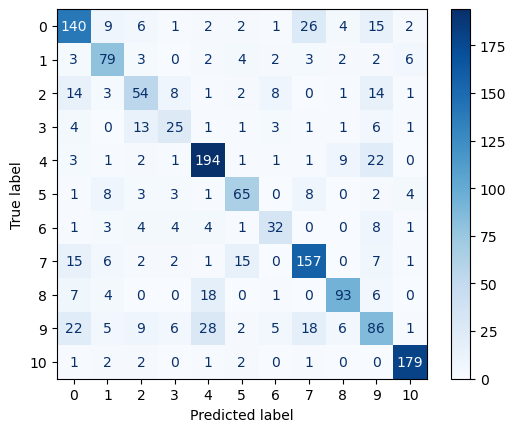

In [24]:
gr = LogisticRegression()
gr.fit(x_train, y_train)
performance(gr, x_test, y_test)

In [16]:
from sklearn.model_selection import cross_validate

cv1 = cross_validate(lreg_ft, x, y, cv=5, scoring='accuracy', n_jobs=2)
cv2 = cross_validate(gr, x, y, cv=5, scoring='accuracy', n_jobs=2)
cv3 = cross_validate(model, x, y, cv=5, scoring='accuracy', n_jobs=2)

/Users/ptiwari/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ptiwari/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [17]:
print(cv1['test_score'])
print(cv2['test_score'])
print(cv3['test_score'])

[0.68507937 0.67428571 0.67746032 0.67746032 0.69186785]
[0.67809524 0.66984127 0.66095238 0.67555556 0.69377382]
[0.67809524 0.66984127 0.66095238 0.67555556 0.69377382]


In [18]:
print(cv1['test_score'].mean())
print(cv2['test_score'].mean())
print(cv3['test_score'].mean())

0.6812307133781086
0.6756436538190032
0.6756436538190032


In [19]:
print(cv1['score_time'])
print(cv2['score_time'])
print(cv3['score_time'])

[0.00822616 0.00873089 0.01472902 0.008358   0.00775886]
[0.01110792 0.01016092 0.01095772 0.01485705 0.00833392]
[0.01170588 0.01036501 0.01157188 0.01002192 0.00801611]


In [15]:
joblib.dump(lreg_ft, "Models/Fine-tuned/Logistic Regression.pk1")

['Models/Fine-tuned/Logistic Regression.pk1']